<a href="https://colab.research.google.com/github/NGUYEN-VAN-HCMUT/DL2021/blob/main/4_0_linearly_inseparable_datasets_with_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**4: Linearly Inseparable Datasets**

**4.1: The Non-Convex Regions**

**Non-Convex Regions**

What are non-convex regions?

**Linearly Inseparable Regions**

What are linearly inseparable regions?

Here is an image of linearly inseparable, non-convex regions that we would like to identify by clustering.

Let us look at just the data points:

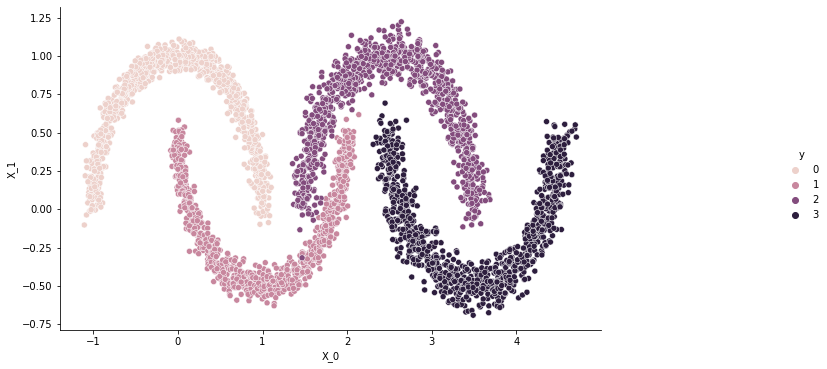

In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

import numpy as np
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

N_Samples = 1000
D = 2
K = 4

X, y = make_moons(n_samples = 2*N_Samples, noise=0.05, shuffle = False)
x_vec, y_vec = make_moons(n_samples = 2*N_Samples, noise=0.08, shuffle = False)
x_vec[:,0] += 2.5
y_vec += 2
X = np.concatenate((X, x_vec), axis=0)
y = np.concatenate((y, y_vec), axis=0)

moon_df = pd.DataFrame({'X_0':X[:,0], 'X_1':X[:,1], 'y':y})
g = sns.pairplot(x_vars="X_0", y_vars="X_1", hue="y", data = moon_df)
g.fig.set_size_inches(14, 6)
sns.despine()

**4.2: Linearly Inseparable Datasets**

Applying k-means to the dataset:We see that the k-means failed. Let us now try GMMs

**Exercise:**

Let us now create this dataset of 4 almonds using half-moons.

Create a dataframe, moon_df with the structure given the X, y.

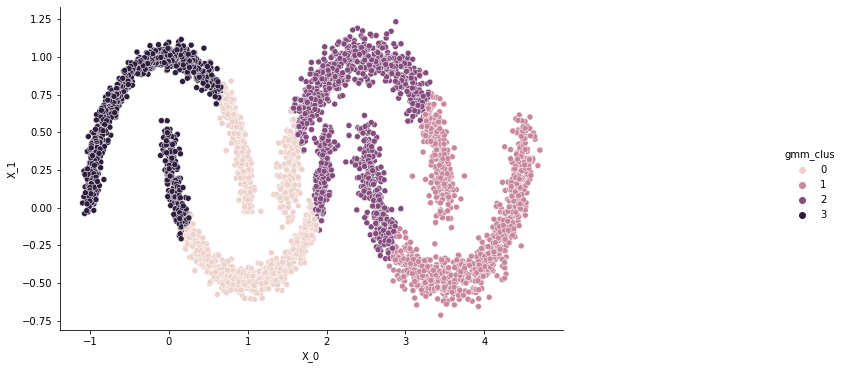

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

import numpy as np
import seaborn as sns
import pandas as pd

from sklearn import datasets
from sklearn import mixture
from sklearn.mixture import GaussianMixture

#Generate the half moon data-set (4-halfmoons)
N_Samples = 1000
X, y = make_moons(n_samples = 2*N_Samples, noise=0.05, shuffle = False)
x_vec, y_vec = make_moons(n_samples = 2*N_Samples, noise=0.08, shuffle = False)
x_vec[:,0] += 2.5
y_vec += 2
X = np.concatenate((X, x_vec), axis=0)
y = np.concatenate((y, y_vec), axis=0)

#visualizing using seaborn library
moon_df = pd.DataFrame({'X_0':X[:,0],'X_1':X[:,1], 'y':y})

mixture_model = GaussianMixture(n_components = 4, covariance_type = 'spherical')
mixture_model.fit(X)
moon_df['gmm_clus'] = mixture_model.predict(X)
# Plot the clusters
g = sns.pairplot(x_vars="X_0", y_vars="X_1", hue="gmm_clus", data = moon_df)
g.fig.set_size_inches(14, 6)
sns.despine()
#sns.plt.show()